# ⭐ Scalling Machine Learning in Three Week course ⭐

## Intro to MLFlow

In this excercise, you will use:
* MLflow
* Track runa and experiment
* MLFlow cli
* ElasticNet by sklearn
* Training a simple model to understand MLFlow tracking capabilites.


This excercise is part of the [Scaling Machine Learning with Spark book](https://learning.oreilly.com/library/view/scaling-machine-learning/9781098106812/)
available on the O'Reilly platform or on [Amazon](https://amzn.to/3WgHQvd).

In [1]:
# The data set used in this example is from http://archive.ics.uci.edu/ml/datasets/Wine+Quality
# P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
# Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

import os
import warnings
import sys

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn

import logging

In [2]:
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

## Set eval metrics for 
We are using rmse, mae and r2.


rmse - Root Mean Squared Error

mae - Mean Absolute Error

**RMSE and MAE** - The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.

> In our case of ElasticNet is part of the Linear Regression family where the x (input) and y (output) are assumed to have a linear relationship.



**r2**- A higher value of R square is considered desirable. R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable.

### MAE
Mean Absolute Error - In the context of machine learning, absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

![text](../figures/mae.jpeg)

### RMSE
It measures the average difference between values predicted by a model and the actual values. 

It provides an estimation of how well the model is able to predict the target value (accuracy).


### R2 or R Square

Statistical measure that represents the goodness of fit of a regression model. 

The ideal value for r-square is **1**. 

The closer the value of r-square to 1, the better is the model fitted.

![text](../figures/rsquare.jpeg)

In [3]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [4]:
    # Read the wine-quality csv file from path
    csv_path = (
        "../datasets/winequality-red.csv"
    )
    try:
        data = pd.read_csv(csv_path, sep=";")
    except Exception as e:
        logger.exception(
            "Error: %s", e)

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Creating Test, Set and parmeters 

In [6]:
    # Split the data into training and test sets. (0.75, 0.25) split.
    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]

    # 1 0r 0.5
    alpha = 0.5
    # 1 or o.5
    l1_ratio = 0.5

## MLFlow

It's time to learn more about MLFlow. 
To better gain hands on experience, let's go over the following steps, which are enabled to you by the available code snippets. I do encourage you to experiment and try run different variations of the model by changing the code.

1. create an experiment
2. try multiple runs within an experiment
3. collect metrics 
4. explore experiments directory and runs

In [7]:
    run_id = 0

    with mlflow.start_run() as run:
        run_id = run.info.run_id
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        predicted_qualities = lr.predict(test_x)

        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        print("Elasticnet model (alpha={:f}, l1_ratio={:f}):".format(alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(lr, "model", registered_model_name="ElasticnetWineModel")
        else:
            mlflow.sklearn.log_model(lr, "model")

Elasticnet model (alpha=0.500000, l1_ratio=0.500000):
  RMSE: 0.7872150893245666
  MAE: 0.6382297731300293
  R2: 0.11845002046973885


## 🚀🚀🚀 Great! 

Now, let's go back to **mlrun** folder in your jupyter envirnment, and go over the project there to better understand the stracture of MLflow experiment! 

You will see experiment 0 and all the runs within it: 
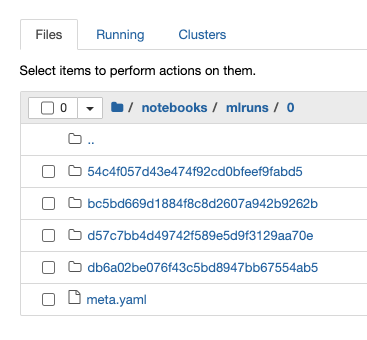

#### Question - which experiment did we run?
Looking at our mlruns directory, there is a folder named 0.
0 is the experiemnt id.
Let's have a look at our experiment details.

In [8]:
experiment_id = "0"
experiment = mlflow.get_experiment(experiment_id)
print("Name: {}".format(experiment.name))
print("Artifact Location: {}".format(experiment.artifact_location))
print("Lifecycle_stage: {}".format(experiment.lifecycle_stage))

Name: Default
Artifact Location: file:///home/jovyan/notebooks/mlruns/0
Lifecycle_stage: active


You can also run the next command from the terminal:
    
> ```mlflow experiments list```

#### How about run details?
We can investigate that throught code as well! 


In [9]:
from  mlflow.tracking import MlflowClient

client = MlflowClient()
data = client.get_run(run_id).data
data

<RunData: metrics={'mae': 0.6382297731300293,
 'r2': 0.11845002046973885,
 'rmse': 0.7872150893245666}, params={'alpha': '0.5', 'l1_ratio': '0.5'}, tags={'mlflow.log-model.history': '[{"run_id": "c9c022f0fa27476facee0002204ba2ea", '
                             '"artifact_path": "model", "utc_time_created": '
                             '"2023-05-05 12:25:02.022308", "flavors": '
                             '{"python_function": {"model_path": "model.pkl", '
                             '"loader_module": "mlflow.sklearn", '
                             '"python_version": "3.9.4", "env": "conda.yaml"}, '
                             '"sklearn": {"pickled_model": "model.pkl", '
                             '"sklearn_version": "0.24.2", '
                             '"serialization_format": "cloudpickle"}}}]',
 'mlflow.source.name': '/opt/conda/lib/python3.9/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'jovyan'}>

In [10]:
mlflow.end_run()

## Well Done! 👏👏👏
## You just finished: Intro to MLflow
## Next: Intro to PySpark